In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score ,classification_report 
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784',version=1)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
import pandas as pd
X=mnist['data']
y=mnist['target']
y=y.astype(np.int8)


In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


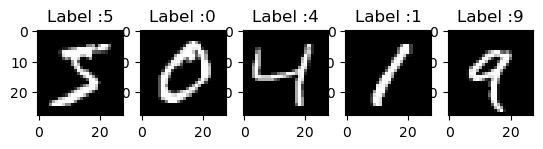

In [6]:
def plot_image(image,label,num=5):
        b=np.array(image)
        for i in range(num):
            plt.subplot(1,5,i+1)
            c=b[i].reshape(28,28)
            plt.imshow(c,cmap='gray')
        
            plt.title(f"Label :{label[i]}")
        plt.show()

image=X[:5]
label=y[:5]
plot_image(image,label)

In [7]:
image=X[:5]
label=y[:5]
a=np.array(image)
b=a[0].reshape(28,28)
c=a[1].reshape(28,28)

In [8]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

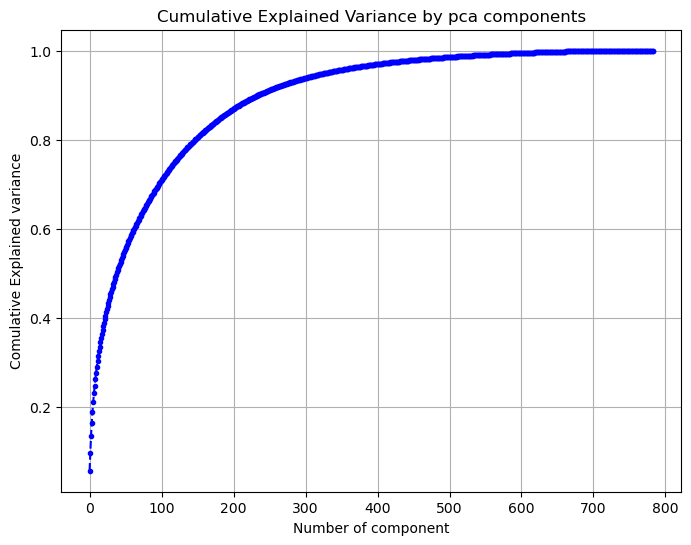

In [9]:
pca=PCA()
pca.fit(X_train_scaled)
explained_variance_ratio=pca.explained_variance_ratio_

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance_ratio),marker='.',linestyle='--',color='b')
plt.title("Cumulative Explained Variance by pca components")
plt.xlabel('Number of component')
plt.ylabel('Comulative Explained variance')
plt.grid(True)
plt.show()

In [10]:
comulative_variance=0.90
n_components=np.argmax(np.cumsum( (explained_variance_ratio)) >=(comulative_variance))
print(n_components)

234


In [11]:
pca_opt=PCA(n_components=n_components)
X_train_scaled_pca=pca_opt.fit_transform(X_train_scaled)
X_test_scaled_pca=pca_opt.transform(X_test_scaled)

In [12]:
rnd_org=RandomForestClassifier(n_estimators=100 ,random_state=42)
rnd_org.fit(X_train_scaled,y_train)
y_pred=rnd_org.predict(X_test_scaled)

accuracy_orginal=accuracy_score(y_test , y_pred)
print(accuracy_orginal)

0.9674285714285714


In [13]:
rnd_org=RandomForestClassifier(n_estimators=100 ,random_state=42)
rnd_org.fit(X_train_scaled_pca,y_train)
y_pred_pca=rnd_org.predict(X_test_scaled_pca)

accuracy_orginal=accuracy_score(y_test , y_pred_pca)
print(accuracy_orginal)

0.9394285714285714


In [14]:
print(classification_report(y_pred_pca,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1350
           1       0.98      0.98      0.98      1597
           2       0.94      0.92      0.93      1419
           3       0.93      0.91      0.92      1454
           4       0.95      0.92      0.94      1331
           5       0.92      0.93      0.92      1250
           6       0.96      0.96      0.96      1398
           7       0.93      0.93      0.93      1503
           8       0.89      0.94      0.91      1297
           9       0.91      0.92      0.91      1401

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



In [15]:
def plot_image_mnist(image,image_pca,label,num=5):
        b=np.array(image)
        k=np.array(image_pca)
        for i in range(num):
            plt.subplot(2,num,i+1)
            c=b[i].reshape(28,28)
            plt.imshow(c,cmap='viridis')


            plt.subplot(2,num,i+1+num)
            f=k[i].reshape(28,28)
            plt.imshow(f,cmap='viridis')

        plt.show()

In [16]:
X_train_scaled_pca.shape

(56000, 234)

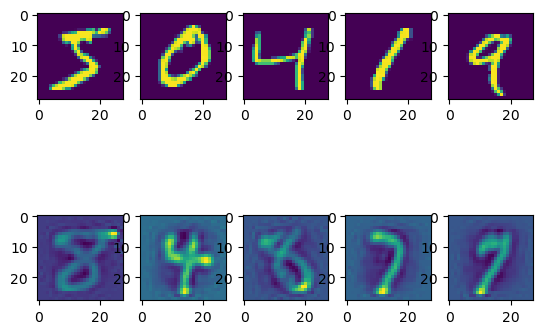

In [17]:
image=X[:5]
label=y[:5]
X_test_pca_reconstruct=pca_opt.inverse_transform(X_test_scaled_pca)
image_pca=X_test_pca_reconstruct[:5]
plot_image_mnist(image,image_pca,label)


In [18]:
X_test_pca_reconstruct

array([[-1.39795932e-15,  5.58936184e-16,  1.19949491e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.02762082e-15, -4.68973331e-19,  5.27579072e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.92688520e-17,  9.18333145e-16,  8.98051149e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.09905547e-16,  7.01276628e-18, -3.19952911e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.37343767e-15, -1.47878878e-16, -6.27256224e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.00793640e-16, -6.46534778e-17, -3.30731703e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

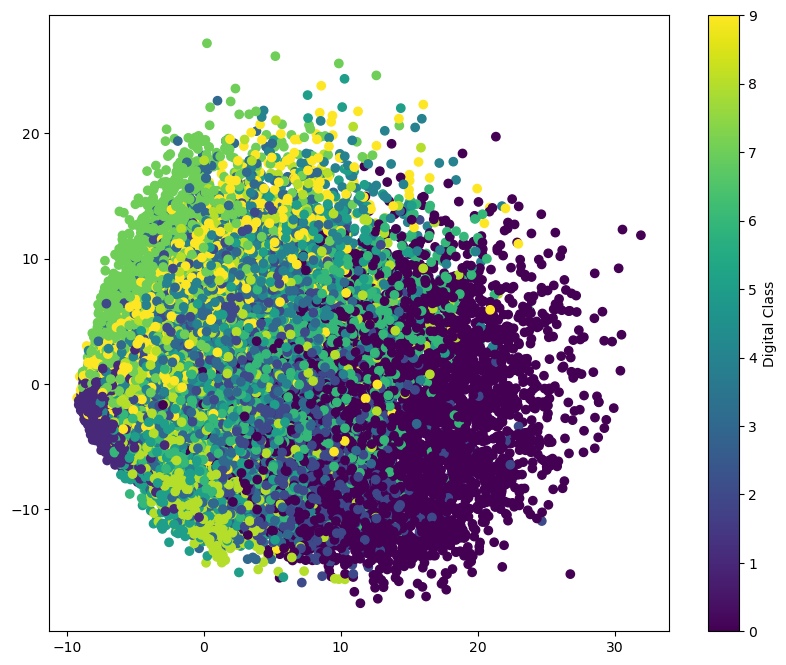

In [19]:
plt.figure(figsize=(10,8))
scatter=plt.scatter(X_train_scaled_pca[: ,0] ,X_train_scaled_pca[: ,1], c=y_train)

plt.colorbar(scatter ,label='Digital Class')

In [20]:
!pip install umap-learn

In [21]:
import umap 
from umap import UMAP

In [22]:
umap_2d=UMAP(n_components=2, random_state=42)
X_umap=umap_2d.fit_transform(X_train_scaled)

C:\Users\Lenovo\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [23]:
X_umap

array([[-1.5845666, 12.082996 ],
       [ 1.1171122, -1.2055724],
       [-2.2015839,  1.5570314],
       ...,
       [-5.821373 , -2.37509  ],
       [ 1.4824867,  9.470121 ],
       [ 1.6610912,  8.809397 ]], dtype=float32)

In [24]:
rnd_umap=RandomForestClassifier(n_estimators=100 , random_state=42)

In [25]:
X_train_scaled_umap=rnd_umap.fit(X_train_scaled,y_train)
y_pred_umap=rnd_umap.predict(X_test_scaled)

In [26]:
accuracy_score_umap=accuracy_score(y_pred_umap ,y_test)
accuracy_score_umap

0.9674285714285714

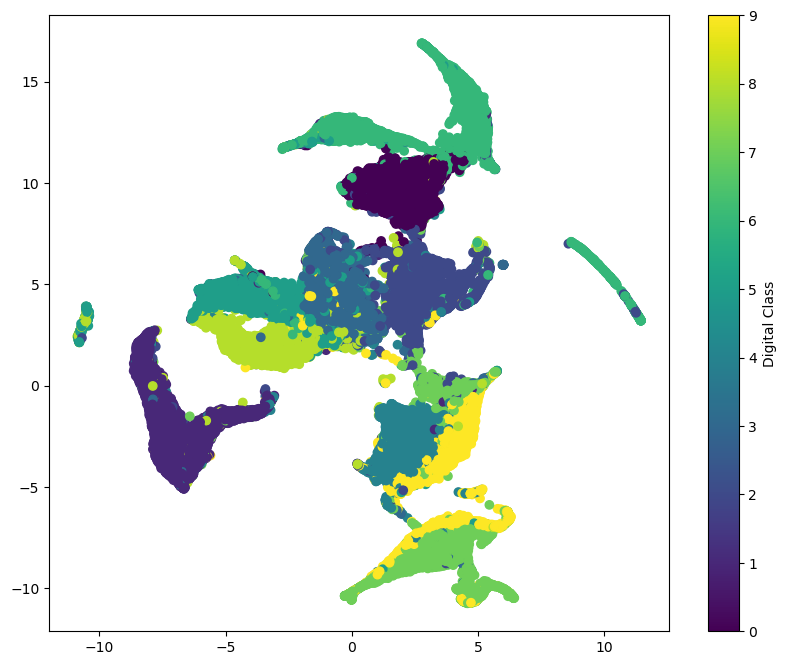

In [27]:
plt.figure(figsize=(10,8))
scatter=plt.scatter(X_umap[: ,0] ,X_umap[: ,1], c=y_train)

plt.colorbar(scatter ,label='Digital Class')

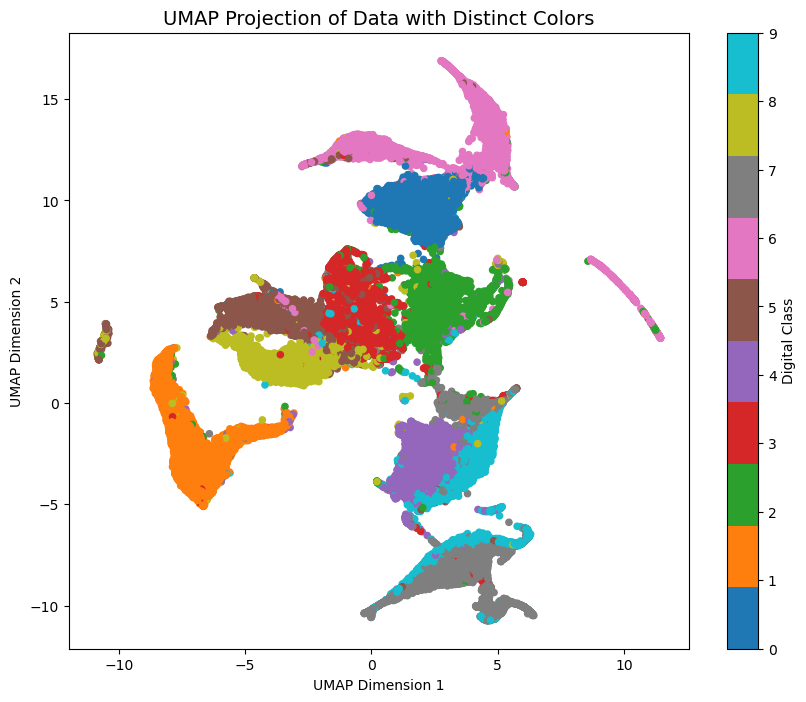

In [28]:
import matplotlib.pyplot as plt

# Create the plot with a distinct colormap
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap='tab10', s=20)  # 'tab10' has 10 distinct colors

# Add a color bar with labels
plt.colorbar(scatter, label='Digital Class')

# Add title and labels for better readability
plt.title('UMAP Projection of Data with Distinct Colors', fontsize=14)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.show()


In [29]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2 ,random_state=42)


In [30]:
X_tsne=tsne.fit_transform(X_train_scaled)

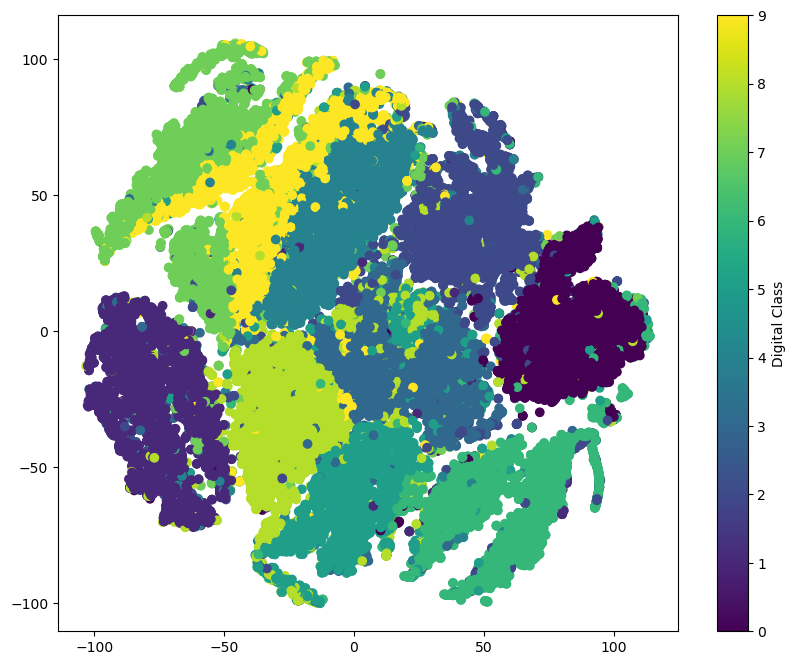

In [31]:
plt.figure(figsize=(10,8))
scatter=plt.scatter(X_tsne[: ,0] ,X_tsne[: ,1], c=y_train)

plt.colorbar(scatter ,label='Digital Class')

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
X_LDA=lda.fit_transform(X_train_scaled ,y_train)
X_LDA_test=lda.transform(X_test_scaled)

In [35]:
rnd=RandomForestClassifier(n_estimators=100 ,random_state=42)
rnd.fit(X_LDA , y_train)
y_pred_lda=rnd.predict(X_LDA_test)
accuracy=accuracy_score(y_test ,y_pred_lda)

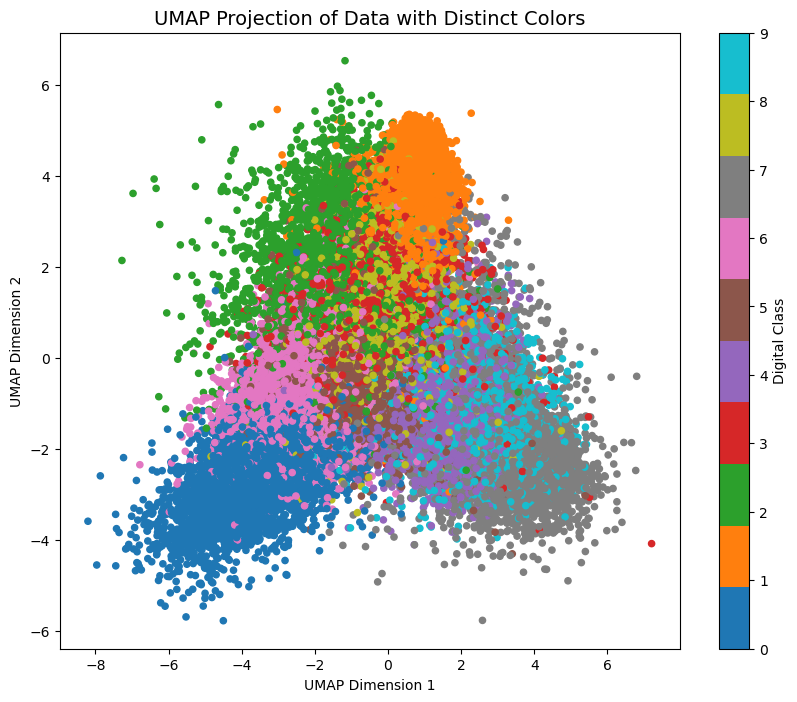

In [37]:
import matplotlib.pyplot as plt

# Create the plot with a distinct colormap
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_LDA[:, 0], X_LDA[:, 1], c=y_train, cmap='tab10', s=20)  # 'tab10' has 10 distinct colors

# Add a color bar with labels
plt.colorbar(scatter, label='Digital Class')

# Add title and labels for better readability
plt.title('UMAP Projection of Data with Distinct Colors', fontsize=14)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.show()